# CS381/780 Data Analytics Final Project

### Due on 12/9/2020 23:59 pm

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [74]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

### Dataset is based on data provided by LendingClub 

https://www.lendingclub.com
    
### The dataset was provided by Kaggle and contains information on loan borrowers 
collected by LendingClub from the year 2007 to 2010. 



Listing of attributes:
    
* credit.policy: a set of guidelines and criteria that decides on credit limits, credit terms, and how to go about delinquent accounts. The borrower either meets the criteria (represented by the integer 1 in our data) or does not (represented by 0 in our data).
* purpose: purpose of the loan contracted (a.i: installment, debt consolidation)
* int.rate: interest rate on the loan.
* installment: monthly payment owed by the borrower.
* log.annual.inc: natural logarithm of self-reported income.
* dti: Debt-to-Income ratio
* fico: FICO score of loan borrowers
* days.with.cr.line: number of days with line of credit.
* revol.bal: revolving balance or the portion of credit that remains unpaid after billing cycle.
* revol.util: revolving utilization or debt-to-limit ratio, debt divided by credit limit.
* inq.last.6mths: inquiries during last 6 months. Inquiries happen when a financial institution checks your credit to make a lending decision, this usually happens when you apply for credit. There are two types of inquiries: hard inquiries or ‘hard pulls’ when you apply for mortgage, credit card… and soft inquiries or ‘soft pulls’ for credit card offers or employment. For the purpose of this project, we will consider the data to represent ‘hard pulls’.
* delinq.2yrs: number of loan delinquencies (30 days or more past due on a payment) reported during the past 2 years.
* pub.rec: number of derogatory public records of loan borrowers.
* not.fully.paid: this column shows whether a loan was not fully paid (1) or fully paid (0)

### Your task in the final project is build the best predictive model to predict what type of borrower will be more likely to default (i.e not fully paid back their loan)

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped 100



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


In [75]:
df = pd.read_csv("lendingclub_loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


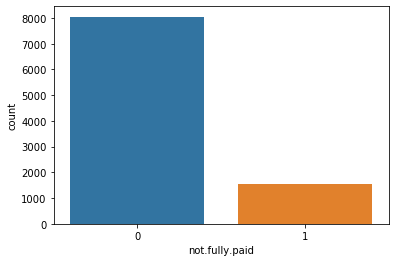

In [76]:
sns.countplot(df['not.fully.paid'])

### Good Luck !!!

Show all your work below

In [77]:
df.shape

(9581, 14)

In [78]:
#exploring checking data
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment           True
log.annual.inc        True
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

# First i wanna clean up the data a bit

In [79]:
#want to get rid of the nulls to clean up the data we are working with
df.dropna(inplace=True)
df.shape

(9580, 14)

In [80]:
#checking data afterwords no nulls ok
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

# Didnt really think that normalizing the data was necessary.

In [81]:
#credit and balances more or less in the same range
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# creditLoans = df[["credit.policy","int.rate","installment","log.annual.inc","days.with.cr.line", "revol.bal", "fico"]]
# record = ["pub.rec", "revol.util", "dti","inq.last.6mths"]
# creditLoans.head()

In [82]:
# scaler = StandardScaler()
# record = scaler.fit_transform(creditLoans)
# record = pd.DataFrame(creditLoans, columns =["credit.policy","int.rate","installment","days.with.cr.line", "revol.bal", "fico"])
# record.head()

In [83]:
# minMaxScaler = MinMaxScaler()
# minMax_df = minMaxScaler.fit_transform(record)

In [84]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000,9.580000e+03,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000
mean,0.805010,0.122642,319.075737,10.932306,12.605959,710.807411,4560.712339,1.691150e+04,46.793265,1.577557,0.163883,0.062109,0.160021
std,0.396213,0.026845,207.051846,0.614887,6.883431,38.674520,2496.672583,3.375310e+04,29.014330,2.200024,0.546292,0.262100,0.366645
min,0.000000,0.060000,15.670000,7.547502,0.000000,50.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.217500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.929887,12.660000,707.000000,4139.958333,8.593000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.487500,11.294769,17.950000,737.000000,5730.000000,1.824450e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,999.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [85]:
df.groupby('not.fully.paid').mean()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
not.fully.paid,,,,,,,,,,,,
0,0.832360,0.120773,314.558964,10.941313,12.493584,713.279980,4592.559396,16119.990307,45.752759,1.434075,0.161799,0.056543
1,0.661448,0.132452,342.785114,10.885023,13.195838,697.828441,4393.541259,21066.293542,52.255075,2.330724,0.174821,0.091324


In [86]:
#not fully paid (1) or fully paid (0)
# of people that fully paid  = 1533
#of people that did not pay 8047
df['not.fully.paid'].value_counts()

0    8047
1    1533
Name: not.fully.paid, dtype: int64


# EDA now i wanna look at a few graphs get a the feel for the data 

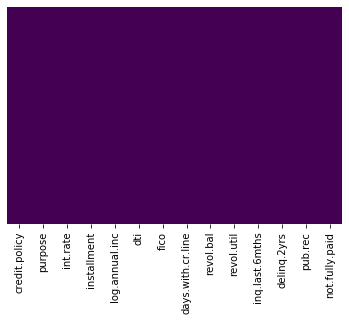

In [87]:
# checking 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

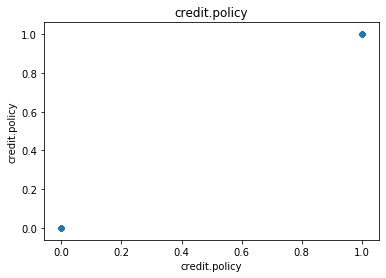

In [88]:
# want to look at a few of the plots checking for outliars in our data 
df.plot.scatter(x='credit.policy', y='credit.policy')
plt.title('credit.policy')
plt.show()

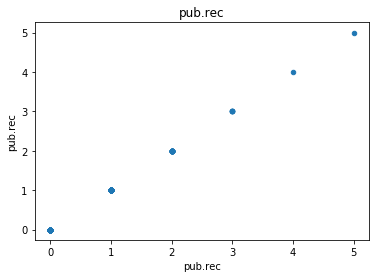

In [89]:
df.plot.scatter(x='pub.rec', y='pub.rec')
plt.title('pub.rec')
plt.show()

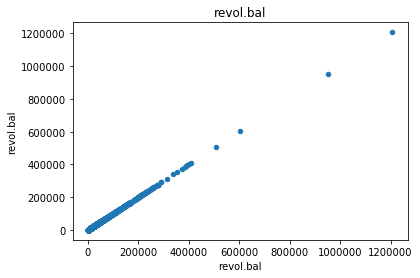

In [90]:
df.plot.scatter(x='revol.bal', y='revol.bal')
plt.title('revol.bal')
plt.show()

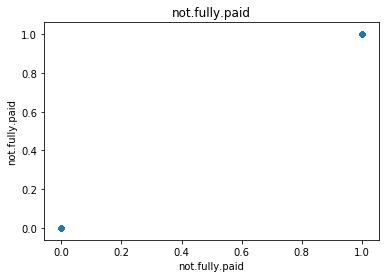

In [91]:
df.plot.scatter(x='not.fully.paid', y='not.fully.paid')
plt.title('not.fully.paid')
df.plot.scatter
plt.show()

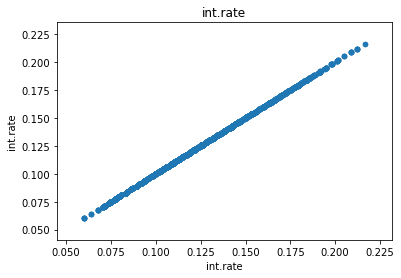

In [92]:
df.plot.scatter(x='int.rate', y='int.rate')
plt.title('int.rate')
df.plot.scatter
plt.show()

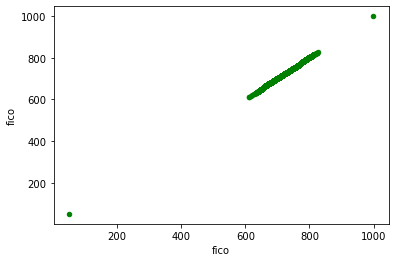

In [93]:
#fico has some outliars
df.plot(kind='scatter', x = "fico", y = "fico", color = "green")

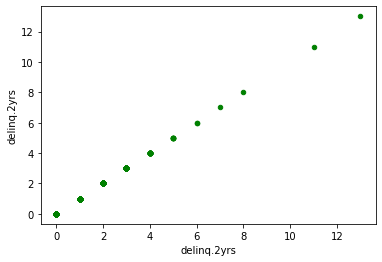

In [94]:
# df.plot.scatter(x='delinq.2yrs', y='delinq.2yrs')
# plt.title('delinq.2yrs')
# df.plot.scatter
# plt.show()
df.plot(kind='scatter', x = "delinq.2yrs", y = "delinq.2yrs", color = "green")

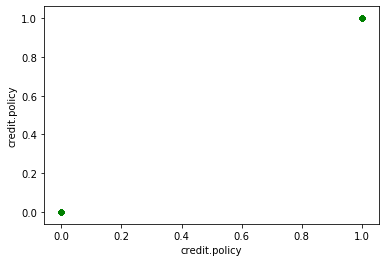

In [126]:
df.plot(kind='scatter', x = "credit.policy", y = "credit.policy", color = "green")

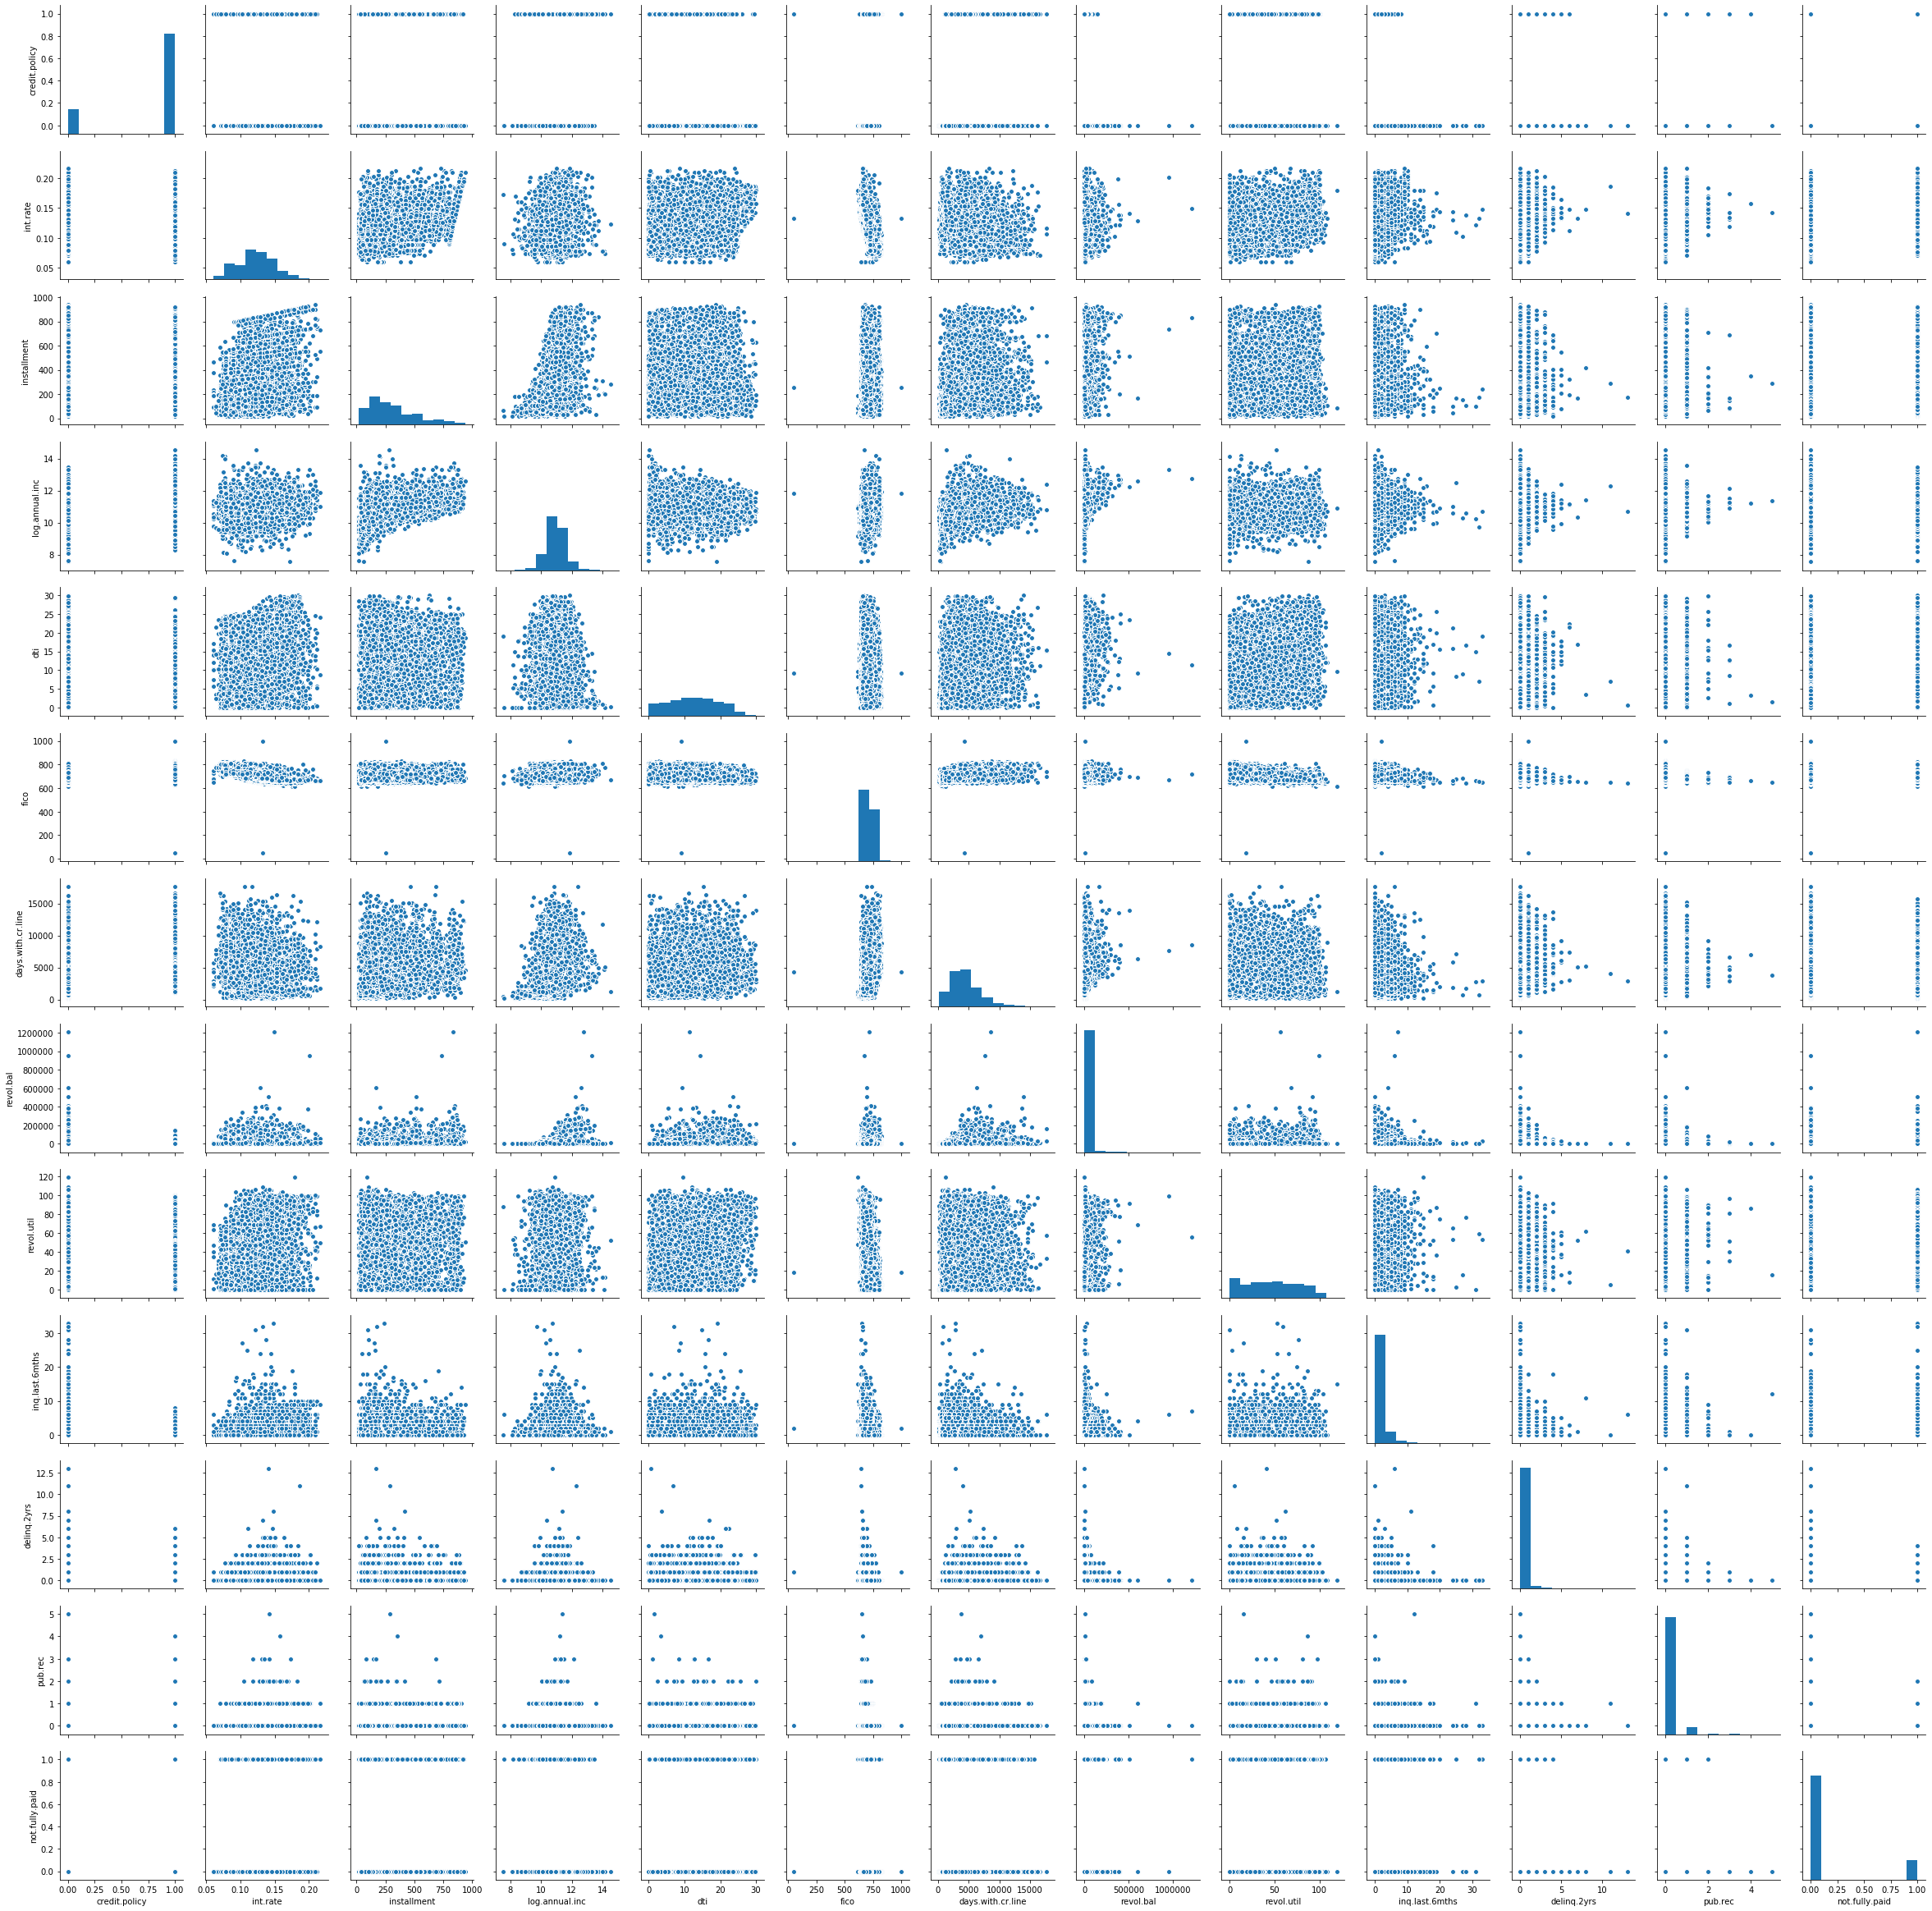

In [96]:
#seperating into traning and testing set going to check corr and sns plot
#look at a few graph representations our data see if we have any missing vals
sns.pairplot(data = df, kind = "scatter" )



# two outliars for fico a score less than 300 and greater than 850 so im getting rid of those

In [97]:
#removing outliars

df = df[df['fico']>=600]
df = df[df['fico']<=800]
df = df[df['revol.bal']<=40000]

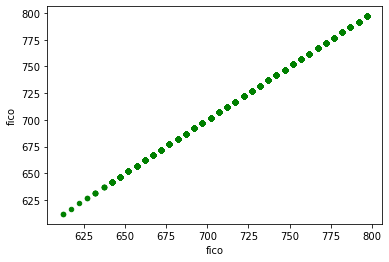

In [98]:
#fico has some outliars
df.plot(kind='scatter', x = "fico", y = "fico", color = "green")

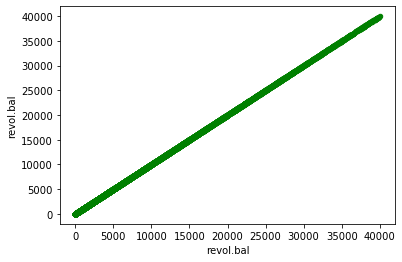

In [100]:
# revol.bal has some outliars
df.plot(kind='scatter', x = "revol.bal", y = "revol.bal", color = "green")

In [101]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [102]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.291544,0.103427,0.104821,-0.046820,0.373026,0.157244,0.063957,-0.081994,-0.560933,-0.085226,-0.061095,-0.153647
int.rate,-0.291544,1.000000,0.258309,0.034356,0.191554,-0.719701,-0.139964,0.129152,0.448218,0.201981,0.156835,0.099690,0.154605
installment,0.103427,0.258309,1.000000,0.432378,0.021491,0.091033,0.156274,0.320666,0.066733,-0.017661,0.001365,-0.027346,0.037324
log.annual.inc,0.104821,0.034356,0.432378,1.000000,-0.100950,0.121229,0.303725,0.342329,0.012543,0.020503,0.046016,0.034412,-0.057764
dti,-0.046820,0.191554,0.021491,-0.100950,1.000000,-0.211258,0.041925,0.320868,0.305030,0.023950,-0.021006,0.007883,0.027530
fico,0.373026,-0.719701,0.091033,0.121229,-0.211258,1.000000,0.251506,-0.093218,-0.521360,-0.184165,-0.219700,-0.147838,-0.149703
days.with.cr.line,0.157244,-0.139964,0.156274,0.303725,0.041925,0.251506,1.000000,0.240219,-0.031680,-0.049892,0.099630,0.092283,-0.040768
revol.bal,0.063957,0.129152,0.320666,0.342329,0.320868,-0.093218,0.240219,1.000000,0.449774,-0.033809,-0.052865,-0.035230,-0.000231
revol.util,-0.081994,0.448218,0.066733,0.012543,0.305030,-0.521360,-0.031680,0.449774,1.000000,-0.025333,-0.045576,0.070461,0.074266
inq.last.6mths,-0.560933,0.201981,-0.017661,0.020503,0.023950,-0.184165,-0.049892,-0.033809,-0.025333,1.000000,0.020935,0.070010,0.146549


# Choosing two models to work with, descion tree and logistic working with credit and not paid full, credit had a good correlation and so did fico

# Model# 1 Decision Tree

In [103]:
#seperating into training and testing for descion
#import the model 
from sklearn import svm
from sklearn.model_selection import train_test_split
x = df['credit.policy'].values.reshape(-1, 1)
y = df['not.fully.paid'].values.reshape(-1, 1)
xTrain,xTest,yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=101) #20 percent test
TreeModel = DecisionTreeClassifier(max_depth=3,  criterion = "entropy")
TreeModel.fit(xTrain,yTrain)
prediction = TreeModel.predict(xTest)

In [104]:
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      1466
          1       0.00      0.00      0.00       263

avg / total       0.72      0.85      0.78      1729

0.847888953152


# Cross Validation for my Tree model 

Trial 0, R-squared: 0.014325469371090471  
Trial 1, R-squared: 0.021125891028523913  
Trial 2, R-squared: 0.003175058098626171  
Trial 3, R-squared: 0.007112721143636702  
Trial 4, R-squared: 0.025674160415836256  
Trial 5, R-squared: 0.018050222265606708  
Trial 6, R-squared: 0.036904144032882  
Trial 7, R-squared: 0.03442112823381738  
Trial 8, R-squared: 0.024224421408416075  
Trial 9, R-squared: 0.03500641595285614  
0.022001963195129183


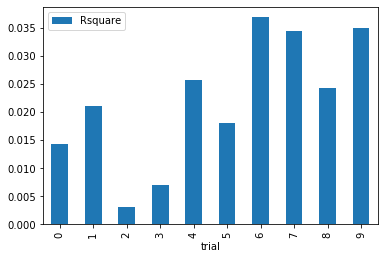

In [105]:
import random
rsquare = []
for i in range(10):
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(xTrain, yTrain)
    yPrediction = model.predict(xTest)
    print('Trial {}, R-squared: {}  '.format(i, metrics.r2_score(yTest, yPrediction)))
    rsquare.append(metrics.r2_score(yTest, yPrediction))
    
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')
print( rdf['Rsquare'].mean())

In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, yPrediction))  
print('Mean Squared Error:', metrics.mean_squared_error(yTest, yPrediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, yPrediction)))
print('R-squared:', metrics.r2_score(yTest, yPrediction))

Mean Absolute Error: 0.260524819424
Mean Squared Error: 0.132470942568
Root Mean Squared Error: 0.363965578823
R-squared: 0.0350064159529


# Tree visualization 

In [107]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [108]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 

# Pick up all featurs columns from your data frame
features = list(df.columns)
features

['credit.policy',
 'purpose',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

In [109]:
# #causeing an error
# dot_data = StringIO()  

# export_graphviz(TreeModel, out_file=dot_data, feature_names=features)
# (graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

# MODEL# 2 Logistic Regression


In [110]:
#Logistic Regression  model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
#logistic regression Model w/o dummy var
#splitting into training and testing
x = df['credit.policy'].values.reshape(-1, 1)
y = df['not.fully.paid'].values.reshape(-1, 1)
xTrain,xTest,yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=101) #20 percent test

In [111]:
logisticR = LogisticRegression()
logisticR.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
yPrediction = logisticR.predict(xTest)
prediction = logisticR.predict(xTest)
print(logisticR.coef_)
print(logisticR.intercept_)


[[-0.93468673]]
[-0.95875381]


In [113]:
logisticRegression_classification_report = classification_report(yTest, prediction)
logisticRegression_accuracy_score = accuracy_score(yTest, prediction)
print(logisticRegression_classification_report)
print(logisticRegression_accuracy_score)

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      1466
          1       0.00      0.00      0.00       263

avg / total       0.72      0.85      0.78      1729

0.847888953152



# Cross Validation for logistic

In [114]:
#logistic with cross validation
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, yPrediction))  
print('Mean Squared Error:', metrics.mean_squared_error(yTest, yPrediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, yPrediction)))
print('R-squared:', metrics.r2_score(yTest, yPrediction))

Mean Absolute Error: 0.152111046848
Mean Squared Error: 0.152111046848
Root Mean Squared Error: 0.390014162368
R-squared: -0.179399727149


Trial 0, R-squared: 0.024113743017377898,Slope: [[-0.14548053]],Intercept: [ 0.27714749], 
Trial 1, R-squared: 0.02398307544526057,Slope: [[-0.14582155]],Intercept: [ 0.27549342], 
Trial 2, R-squared: 0.012288392723086239,Slope: [[-0.15322759]],Intercept: [ 0.28307939], 
Trial 3, R-squared: 0.012851471172501738,Slope: [[-0.15271561]],Intercept: [ 0.28102482], 
Trial 4, R-squared: 0.008213433912241497,Slope: [[-0.15182169]],Intercept: [ 0.28616852], 
Trial 5, R-squared: 0.026313459400072015,Slope: [[-0.14347773]],Intercept: [ 0.2747784], 
Trial 6, R-squared: 0.02046058523933736,Slope: [[-0.14719579]],Intercept: [ 0.28051738], 
Trial 7, R-squared: 0.012963161461827744,Slope: [[-0.15135821]],Intercept: [ 0.27826087], 
Trial 8, R-squared: 0.01786885056465437,Slope: [[-0.14823676]],Intercept: [ 0.27564103], 
Trial 9, R-squared: 0.01217809564659944,Slope: [[-0.15333073]],Intercept: [ 0.28135048], 


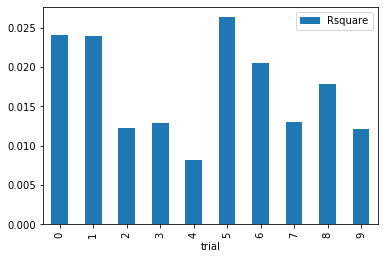

In [115]:
import random
rsquare = []
for i in range(10):
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(xTrain, yTrain)
    yPrediction = model.predict(xTest)
    print('Trial {}, R-squared: {},Slope: {},Intercept: {}, '.format(i, metrics.r2_score(yTest, yPrediction), \
                                                                      model.coef_, model.intercept_))
    rsquare.append(metrics.r2_score(yTest, yPrediction))
    
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [116]:
df.mean()

credit.policy            0.820569
int.rate                 0.122550
installment            307.125250
log.annual.inc          10.865056
dti                     12.366339
fico                   709.335146
days.with.cr.line     4356.029683
revol.bal            10216.130842
revol.util              46.062256
inq.last.6mths           1.580171
delinq.2yrs              0.172027
pub.rec                  0.065942
not.fully.paid           0.156062
dtype: float64

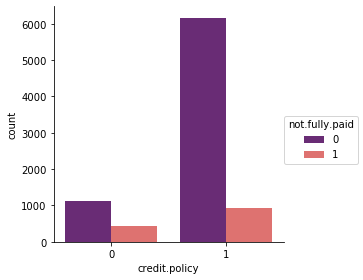

In [117]:
#the ones that paid had a better credit policy then the ones that didn't
sns.factorplot('credit.policy', kind='count', hue='not.fully.paid', data=df,palette='magma')

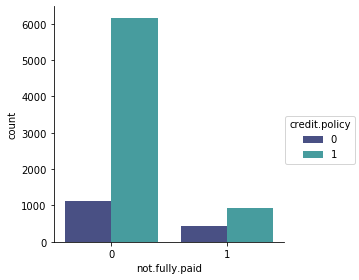

In [118]:
sns.factorplot('not.fully.paid', kind='count', hue='credit.policy', data=df,palette='mako')

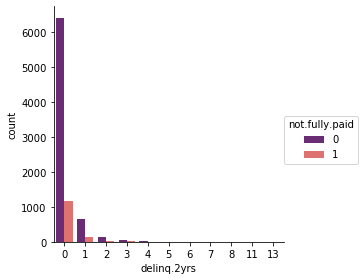

In [119]:
sns.factorplot('delinq.2yrs', kind='count', hue='not.fully.paid', data=df,palette='magma')

# The ones that paid had a better fico score 

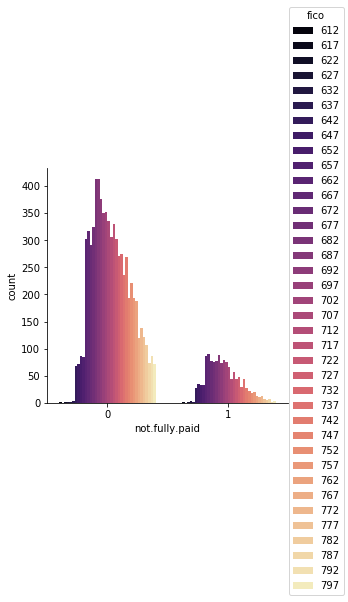

In [120]:
sns.factorplot(x = 'not.fully.paid', kind='count', hue='fico', data=df,palette='magma')

# Dummy Varaibles 

# im looking over the potential candidates to place under dummy var and it seems like there is only one that i can recognize such having a duo catagory which i think is  purpose.
# i thought that perhaps revo util or dti could be but a ratio is combination of two things as one entity 

In [121]:
purpose = pd.get_dummies(df['purpose'], drop_first = True)
df2 = pd.concat([df, purpose], axis = 1)
df2.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# now im going to test and see the outcome without the dummy var in a tree and see if it is any better without it

In [122]:
#Logistic Regression  model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
#logistic regression Model w/o dummy var
#splitting into training and testing
x = df['credit.policy'].values.reshape(-1, 1)
y = df['not.fully.paid'].values.reshape(-1, 1)
xTrain,xTest,yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=101) #20 percent test

In [123]:
logisticR = LogisticRegression()
logisticR.fit(xTrain, yTrain)
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      1466
          1       0.00      0.00      0.00       263

avg / total       0.72      0.85      0.78      1729

0.847888953152


# not much of a diffrence in improvement im just going to look at it with one more model to see if anything changes, will be using a random forrest this time

In [124]:
myRandomForrest =  DecisionTreeClassifier(max_depth=100, criterion='gini')
myRandomForrest.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [125]:
prediction = myRandomForrest.predict(xTest)
print(confusion_matrix(yTest,prediction))
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

[[1466    0]
 [ 263    0]]
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      1466
          1       0.00      0.00      0.00       263

avg / total       0.72      0.85      0.78      1729

0.847888953152


# horrible f1 scores

# I if could summerize what i see, its obvouis to the note that those that have paid their debts have a better fico score,and the ones that havent paid dont have a good score. The credit policy is also better for those whom have made payments as opposed to those that havent. 